<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Using_Python_for_ESG_reporting_of_CO2_emissions_of_your_Value_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT DESCRIPTION: Using Python for ESG reporting of CO2 emissions of your Value Chain
#### I. steps to build an ESG reporting focusing CO2 emissions of your Value Chain Network


#### As per the GHG Protocol corporate standard, greenhouse gas emissions are categorized into three scopes:

Scope 1: These are the direct emissions released into the atmosphere as a result of the company's activities. This includes emissions from the company's facilities such as manufacturing plants or warehouses, as well as emissions from the company's vehicles.

Scope 2: These are the indirect emissions that occur from the generation of purchased energy. This includes emissions from purchased electricity, gas, and other sources of energy.

Scope 3: These encompass all other indirect emissions, excluding those from Scope 2, that occur throughout the company's value chain. This includes emissions from transportation, waste management, business travel, and other activities.

In this article, we will specifically focus on the calculations related to Scope 3 emissions, particularly those associated with downstream transportation. Understanding the environmental impact of your distribution network is crucial.

##### To estimate the CO2 emissions from transportation, we can refer to the formula provided by the French Environmental Agency Ademe, following the protocol guidelines.
  


In [ ]:
import pandas as pd
import numpy as np
import warnings

In [ ]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
warnings.filterwarnings('ignore')


In [ ]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [ ]:
df_order = pd.read_csv('/content/order_lines.csv', index_col = 0)
print("{:,} order lines to process".format(len(df_lines)))

# Show first three rows of the dataset
df_order.sample(3)

5,208 order lines to process


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros
618694,2021-03-17 00:00:00.000,3-2021,3403434,5002915-15,21016274,11,802797-97,20.0,18.4
570409,2021-03-11 00:00:00.000,3-2021,3403434,5003451-51,21013968,18,8871292-92,20.0,25.9


### Import Master Data and perform Unit of Measure Conversions to (kg)

In [ ]:
df_uom = pd.read_csv('/content/uom_conversions.csv', index_col = 0)
print("{:,} Unit of Measure Conversions".format(len(df_uom)))

# Join
df_uom = df_order.copy()
COLS_JOIN = ['Item Code']
df_join = pd.merge(df_join, df_uom, on=COLS_JOIN, how='left', suffixes=('', '_y'))
df_join.drop(df_join.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
print("{:,} records".format(len(df_join)))
df_join.sample(3)

557 Unit of Measure Conversions
6,357,366 records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio
2558544,2021-04-14 00:00:00.000,4-2021,3403434,5002915-15,21024808,5,8128704-04,30.0,29.35,0.02092
2601309,2021-04-14 00:00:00.000,4-2021,3403434,5002915-15,21024808,43,8755921-21,25.0,10.22,0.01800
3778039,2021-05-31 00:00:00.000,5-2021,3403434,5003451-51,21035518,31,8902753-53,25.0,13.14,0.03200


### Load the Distances dataset: Tier 2 and 3 Supplier in the Value Chain

In [ ]:
# df_dist = pd.read_csv('Data/' + 'distances.csv', index_col = 0)
df_dist = pd.read_csv('/content/distances.csv', index_col = 0)
# Location
df_dist['Location'] = df_dist['Customer Country'].astype(str) + ', ' + df_dist['Customer City'].astype(str)
df_dist.sample(3)

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location
4331,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003269-69,FRANCE,MACON,478.723,0.0,0.0,0.0,"FRANCE, MACON"
1509,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,295.165,0.0,0.0,0.0,"FRANCE, LEVALLOIS PERRET"
682,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE"


### Load the Cities GPS Locations dataset: Tier 2 and 3 Supplier in the Value Chain

In [ ]:
df_gps = pd.read_csv('/content/gps_locations.csv', index_col = 0)
print("{:,} Locations".format(len(df_gps)))

# Show first three rows of the dataset
df_gps.sample(3)

19 Locations


,Location,GPS 1,GPS 2
1087,"FRANCE, AUBROMETZ",50.303749,2.176058
9812,"MAURITANIA, NOUAKCHOTT",18.067171,-15.953561
14137,"UNITED KINGDOM, KENT",51.196396,0.742644


### Exploratory Data Analysis
#### Combine into a Single Dataframe by Merging the Distance with GPS Locations datasets

In [ ]:
df_dist = pd.merge(df_dist, df_gps, on='Location', how='left', suffixes=('', '_y'))
df_dist.drop(df_dist.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

# Show first three rows of the merged dataset
df_dist.sample(3)

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
7,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003269-69,FRANCE,MACON,478.723,0.0,0.0,0.0,"FRANCE, MACON",48.878552,2.280117
4,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL",48.624666,2.595756
2,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.304594,10.312521



## Calculation of CO2 emissions in the Value Chain
##### Calculation of CO2 emissions at the order line level is a vital component in assessing the environmental impact of each individual order. By analyzing the CO2 emissions associated with specific order lines, companies can gain valuable insights into the carbon footprint of their operations and make informed decisions to mitigate their environmental impact.

To calculate CO2 emissions at the order line level, several factors need to be considered. These include the type and quantity of products being ordered, the mode of transportation used, the distance traveled, and the fuel efficiency of the vehicles involved. Additionally, factors such as packaging materials, handling processes, and any additional emissions from activities like warehousing and distribution must also be taken into account.

By gathering data on these variables and utilizing appropriate emission factors and calculation methodologies, it is possible to estimate the CO2 emissions generated by each order line. This level of granularity allows companies to identify areas of their supply chain that contribute significantly to emissions and develop targeted strategies to reduce them.

Implementing accurate CO2 emission calculations at the order line level demonstrates a commitment to sustainability and provides valuable information for decision-making. It enables companies to assess the environmental impact of their operations, optimize transportation and logistics processes, and work towards achieving carbon reduction goals.

In conclusion, calculating CO2 emissions at the order line level offers a comprehensive understanding of the environmental impact of each order. By embracing this approach, companies can take proactive steps towards achieving a more sustainable and environmentally responsible supply chain.

In [ ]:
# Calculation At line level
import pandas as pd

df_line = df_join.copy()

dict_co2e = dict(zip(['Air', 'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
MODES = ['Road', 'Rail', 'Sea', 'Air']

for mode in MODES:
    if mode in df_line.columns:
        df_line['CO2 ' + mode] = df_line['Conversion Ratio'].astype(float) / 1000 * df_line[mode].astype(float) * dict_co2e[mode]

df_line['CO2 Total'] = df_line[[col for col in df_line.columns if col.startswith('CO2 ')]].sum(axis=1)

df_line.to_csv('/content/detailed_report.csv')
df_line.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,CO2 Total
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.584,0.0
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.032,0.0
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.032,0.0
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.032,0.0
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.032,0.0


#### Calculating emissions at the order level is a crucial step in understanding the environmental impact of business operations. By analyzing emissions on a per-order basis, companies can gain valuable insights into the carbon footprint associated with their products and take meaningful steps towards sustainability.

##### To calculate emissions at the order level, various factors must be considered. These include the quantity and type of products ordered, the transportation mode utilized, the distance traveled, and the efficiency of the vehicles involved. Additionally, factors such as packaging materials, handling processes, and any additional emissions from warehousing and distribution should be taken into account.

##### In summary, calculating emissions at the order level is an essential practice for understanding and managing environmental impact. By embracing this approach, companies can take proactive measures to reduce their carbon footprint and contribute to a more sustainable future.

In [ ]:
df_join.columns

Index(['Date', 'Month-Year', 'Warehouse Code', 'Customer Code', 'Order Number',
       'Order Line Number', 'Item Code', 'Units', 'Euros', 'Conversion Ratio',
       'KG'],
      dtype='object')

In [ ]:
import pandas as pd

GPBY_ORDER = ['Date', 'Month-Year', 'Warehouse Code', 'Customer Code', 'Order Number',
              'Order Line Number', 'Item Code', 'Euros', 'Conversion Ratio']

df_agg = pd.DataFrame(df_join.groupby(GPBY_ORDER)['KG'].sum()).reset_index()
df_agg.sample(3)

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Euros,Conversion Ratio,KG
2037,2021-04-29 00:00:00.000,4-2021,3403434,5003269-69,21028868,1,8308591-91,6.38,0.02219,186.6179
5013,2021-10-13 00:00:00.000,10-2021,3403434,5002915-15,21086664,87,893133-33,70.39,0.05960,3894.2640
2293,2021-05-11 00:00:00.000,5-2021,3403434,5002915-15,21031660,30,8308611-11,6.38,0.02219,127.8144


In [ ]:
dict_co2e = {'Air': 2.1, 'Sea': 0.01, 'Road': 0.096, 'Rail': 0.028}
MODES = ['Road', 'Rail', 'Sea', 'Air']

for mode in MODES:
    if mode in df_agg.columns:
        df_agg['CO2 ' + mode] = df_agg['KG'].astype(float) / 1000 * df_agg[mode].astype(float) * dict_co2e[mode]

df_agg['CO2 Total'] = df_agg[['CO2 ' + mode for mode in MODES if 'CO2 ' + mode in df_agg.columns]].sum(axis=1)
df_agg.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Euros,Conversion Ratio,KG,CO2 Total
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,381.47,56.58400,113.16800,0.0
1,2021-01-07 00:00:00.000,1-2021,3403434,5340669-69,20203388,1,993081-81,24374.43,16.53807,10121.29884,0.0
2,2021-01-07 00:00:00.000,1-2021,3403434,5340672-72,20203383,1,993081-81,20391.68,16.53807,8467.49184,0.0
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,187.03,0.03200,12168.00000,0.0
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,452.45,0.02219,9330.89500,0.0


In [ ]:
import pandas as pd
import warnings

# Set display options
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
warnings.filterwarnings('ignore')

# Import Shipped Order Lines
df_lines = pd.read_csv('/content/order_lines.csv', index_col=0)
print("{:,} order lines to process".format(len(df_lines)))
df_lines.head()

# Import Unit of Measure Conversions
df_uom = pd.read_csv('/content/uom_conversions.csv', index_col=0)
print("{:,} Unit of Measure Conversions".format(len(df_uom)))

# Join datasets
df_join = pd.merge(df_lines, df_uom, on="Item Code", how="left")
print("{:,} records".format(len(df_join)))
df_join.head()

# Import Distances
df_dist = pd.read_csv('/content/distances.csv', index_col=0)

# Merge with distances dataset
df_join = pd.merge(df_join, df_dist, on=["Warehouse Code", "Customer Code"], how="left")
print("{:,} records".format(len(df_join)))
df_join.head()

# Calculate Weight (KG)
df_join['KG'] = df_join['Units'] * df_join['Conversion Ratio']

# Calculate CO2 emissions at line level
df_line = df_join.copy()

dict_co2e = dict(zip(['Air', 'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
MODES = ['Road', 'Rail', 'Sea', 'Air']
for mode in MODES:
    df_line['CO2 ' + mode] = df_line['KG'].astype(float) / 1000 * df_line[mode].astype(float) * dict_co2e[mode]
df_line['CO2 Total'] = df_line[['CO2 ' + mode for mode in MODES]].sum(axis=1)
df_line.to_csv('detailed_report.csv')
df_line.head()

# Aggregate by order
GPBY_ORDER = ['Date', 'Month-Year', 'Warehouse Code', 'Warehouse Name', 'Warehouse Country', 'Warehouse City',
              'Customer Code', 'Customer Country', 'Customer City',
              'Road', 'Rail', 'Sea', 'Air',
              'Order Number']
df_agg = pd.DataFrame(df_join.groupby(GPBY_ORDER)[['Units', 'KG']].sum())
df_agg.reset_index(inplace=True)
df_agg.head()

# Calculate CO2 Emissions
for mode in MODES:
    df_agg['CO2 ' + mode] = df_agg['KG'].astype(float) / 1000 * df_agg[mode].astype(float) * dict_co2e[mode]
df_agg['CO2 Total'] = df_agg[['CO2 ' + mode for mode in MODES]].sum(axis=1)
df_agg.head()

# Map the delivery mode
df_agg['Delivery Mode'] = df_agg[MODES].astype(float).apply(
    lambda t: [mode if t[mode] > 0 else '-' for mode in MODES], axis=1)
dict_map = dict(zip(df_agg['Delivery Mode'].astype(str).unique(),
                    [i.replace(", '-'", '').replace("'-'", '').replace("'", '') for i in
                     df_agg['Delivery Mode'].astype(str).unique()]))
df_agg['Delivery Mode'] = df_agg['Delivery Mode'].astype(str).map(dict_map)
df_agg

5,208 order lines to process
557 Unit of Measure Conversions
5,208 records
5,208 records


,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Order Number,Units,KG,CO2 Road,CO2 Rail,CO2 Sea,CO2 Air,CO2 Total,Delivery Mode
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,20247100,2.0,113.16800,8.318967,0.0,0.000000,0.0,8.318967,[Road]
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.000000,0.0,207.931963,[Road]
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.000000,0.0,10.708464,[Road]
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.000000,0.0,1.930845,[Road]
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,295.165,0.0,0.0,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.000000,0.0,3.172254,[Road]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-10-26 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,21004398,9040.0,416.74880,2.108175,0.0,0.000000,0.0,2.108175,[Road]
287,2021-10-27 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,21089663,13515.0,493.52420,13.665661,0.0,0.000000,0.0,13.665661,[Road]
288,2021-10-27 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5334855-55,UNITED KINGDOM,KENT,409.000,0.0,44.0,0.0,21009276,450.0,35.34930,1.387955,0.0,0.015554,0.0,1.403509,"[Road, Sea]"
289,2021-10-28 00:00:00.000,10-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,21089497,11831.0,367.71380,9.936674,0.0,0.000000,0.0,9.936674,[Road]


In [ ]:
# Save Final Report
df_agg.to_csv('/content/final_report.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('/content/final_report.csv')

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0                     Date Month-Year  Warehouse Code  \
0  0           2021-01-04 00:00:00.000  1-2021     3403434          
1  1           2021-01-07 00:00:00.000  1-2021     3403434          
2  2           2021-01-07 00:00:00.000  1-2021     3403434          
3  3           2021-01-07 00:00:00.000  1-2021     3403434          
4  4           2021-01-08 00:00:00.000  1-2021     3403434          

           Warehouse Name Warehouse Country        Warehouse City  \
0  WAREHOUSE PARIS AREA 1  FRANCE            CHALONS-EN-CHAMPAGNE   
1  WAREHOUSE PARIS AREA 1  FRANCE            CHALONS-EN-CHAMPAGNE   
2  WAREHOUSE PARIS AREA 1  FRANCE            CHALONS-EN-CHAMPAGNE   
3  WAREHOUSE PARIS AREA 1  FRANCE            CHALONS-EN-CHAMPAGNE   
4  WAREHOUSE PARIS AREA 1  FRANCE            CHALONS-EN-CHAMPAGNE   

  Customer Code Customer Country     Customer City     Road  Rail  Sea  Air  \
0  5002915-15    FRANCE           LES ANGLES        765.728  0.0   0.0  0.0   
1  5340669-6

### Now that we have loaded the dataset, we can proceed with the necessary preprocessing steps and applying machine learning algorithms.

Unnamed: 0        0
Warehouse Code    0
Road              0
Rail              0
Sea               0
Air               0
Order Number      0
Units             0
KG                0
CO2 Road          0
CO2 Rail          0
CO2 Sea           0
CO2 Air           0
CO2 Total         0
dtype: int64


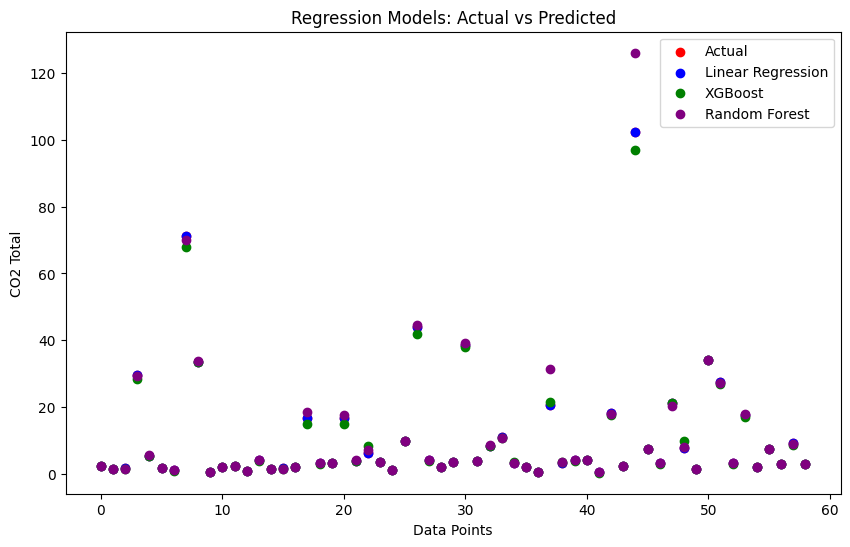

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
data = pd.read_csv('/content/final_report.csv')

# Delete non-numeric columns
data = data.select_dtypes(include=np.number)

# Check for missing values
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separate input features (X) and target variable (y)
X = data.drop('CO2 Total', axis=1)
y = data['CO2 Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# RNN (Recurrent Neural Network)
# Code for RNN implementation goes here

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ANN (Artificial Neural Network)
# Code for ANN implementation goes here

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Linear Regression')
plt.scatter(range(len(y_test)), y_pred_xgb, color='green', label='XGBoost')
plt.scatter(range(len(y_test)), y_pred_rf, color='purple', label='Random Forest')
plt.title('Regression Models: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('CO2 Total')
plt.legend()
plt.show()

### Top

### To rank the performance of the algorithms from top to bottom and visualize the results, we'll need to evaluate the models based on a suitable metric (e.g., mean squared error, R-squared score)

#### The code below evaluates the models using mean squared error (MSE) and R-squared (R2) score, ranks the models based on MSE, and visualizes the relationship between MSE and R2 for each model.

#### After running the code, you'll see the visualization of the model performance and the ranking of models based on MSE. The lower the MSE, the better the performance of the model.

Unnamed: 0        0
Warehouse Code    0
Road              0
Rail              0
Sea               0
Air               0
Order Number      0
Units             0
KG                0
CO2 Road          0
CO2 Rail          0
CO2 Sea           0
CO2 Air           0
CO2 Total         0
dtype: int64


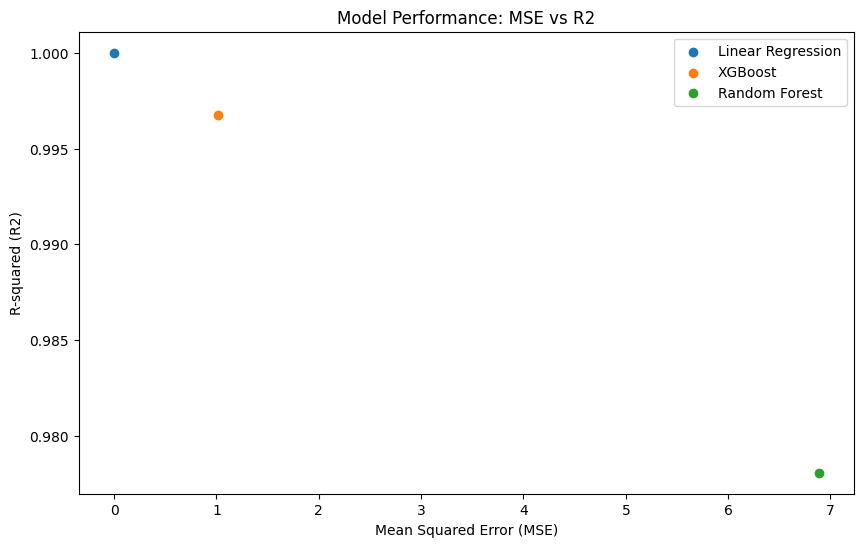

Ranking of models based on MSE:
1. Linear Regression: MSE = 2.3643373033194668e-27, R2 = 1.0
2. XGBoost: MSE = 1.019571960882428, R2 = 0.9967536727428588
3. Random Forest: MSE = 6.884503364831139, R2 = 0.9780796728601786


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
data = pd.read_csv('/content/final_report.csv')

# Delete non-numeric columns
data = data.select_dtypes(include=np.number)

# Check for missing values
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separate input features (X) and target variable (y)
X = data.drop('CO2 Total', axis=1)
y = data['CO2 Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model performance dictionary
model_performance = {}

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_performance['Linear Regression'] = {'MSE': mse, 'R2': r2}

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
model_performance['XGBoost'] = {'MSE': mse_xgb, 'R2': r2_xgb}

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_performance['Random Forest'] = {'MSE': mse_rf, 'R2': r2_rf}

# Sort models based on MSE (lower is better)
sorted_models = sorted(model_performance.items(), key=lambda x: x[1]['MSE'])

# Visualization
plt.figure(figsize=(10, 6))
for model, metrics in sorted_models:
    plt.scatter(metrics['MSE'], metrics['R2'], label=model)

plt.title('Model Performance: MSE vs R2')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('R-squared (R2)')
plt.legend()
plt.show()

# Rank the models based on MSE (lower is better)
print(f"Ranking of models based on MSE:")
for i, (model, metrics) in enumerate(sorted_models):
    print(f"{i+1}. {model}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")